# Kaggle - House Price - 2nd Submission
## 1. Introduction

The first submission result was scored 0.460. Linear regression method was used by using 10 variables which have the highest correlation value. In this attempt, simple linear regression will be used again, but the data input for the modelling will not be limited to the ten highest correlation value. This update also influenced by Notebook made by [Rocio](https://www.kaggle.com/rbyron/simple-linear-regression-models)

## 2. Preparation
### 2.1. Get Data and Required Packages

In [1]:
import pandas as pd

# Check missing value
import missingno as mno

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#
import numpy as np
import scipy.stats as stats

# Preprocessing
from sklearn.preprocessing import StandardScaler

# Regression
from sklearn.linear_model import LinearRegression

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
train = pd.read_csv('../train.csv')
train.head()

FileNotFoundError: ignored

In [ ]:
test = pd.read_csv('../test.csv')
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


## 2.2 Data Preparation
Both the train and the test data will be prepared in parallel. The model is generated using the clean preprocessed train data and will be used to make prediction. The test data must have the same data construction as the clean train dataset. It is better to prepare train and test data in parallel to ensure both are treated in the same way.

### 2.2.1 Merge dataset

In [ ]:
alldata = pd.concat([train.drop('SalePrice', axis=1), test], keys=['train', 'test'])
alldata

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley  \
train 0        1          60       RL         65.0     8450   Pave   NaN   
      1        2          20       RL         80.0     9600   Pave   NaN   
      2        3          60       RL         68.0    11250   Pave   NaN   
      3        4          70       RL         60.0     9550   Pave   NaN   
      4        5          60       RL         84.0    14260   Pave   NaN   
...          ...         ...      ...          ...      ...    ...   ...   
test  1454  2915         160       RM         21.0     1936   Pave   NaN   
      1455  2916         160       RM         21.0     1894   Pave   NaN   
      1456  2917          20       RL        160.0    20000   Pave   NaN   
      1457  2918          85       RL         62.0    10441   Pave   NaN   
      1458  2919          60       RL         74.0     9627   Pave   NaN   

           LotShape LandContour Utilities  ... ScreenPorch PoolArea PoolQC  \
train 0         Reg         Lvl    AllPub  ...           0        0    NaN   
      1         Reg         Lvl    AllPub  ...           0        0    NaN   
      2         IR1         Lvl    AllPub  ...           0        0    NaN   
      3         IR1         Lvl    AllPub  ...           0        0    NaN   
      4         IR1         Lvl    AllPub  ...           0        0    NaN   
...             ...         ...       ...  ...         ...      ...    ...   
test  1454      Reg         Lvl    AllPub  ...           0        0    NaN   
      1455      Reg         Lvl    AllPub  ...           0        0    NaN   
      1456      Reg         Lvl    AllPub  ...           0        0    NaN   
      1457      Reg         Lvl    AllPub  ...           0        0    NaN   
      1458      Reg         Lvl    AllPub  ...           0        0    NaN   

            Fence MiscFeature MiscVal MoSold  YrSold  SaleType  SaleCondition  
train 0       NaN         NaN       0      2    2008        WD         Normal  
      1       NaN         NaN       0      5    2007        WD         Normal  
      2       NaN         NaN       0      9    2008        WD         Normal  
      3       NaN         NaN       0      2    2006        WD        Abnorml  
      4       NaN         NaN       0     12    2008        WD         Normal  
...           ...         ...     ...    ...     ...       ...            ...  
test  1454    NaN         NaN       0      6    2006        WD         Normal  
      1455    NaN         NaN       0      4    2006        WD        Abnorml  
      1456    NaN         NaN       0      9    2006        WD        Abnorml  
      1457  MnPrv        Shed     700      7    2006        WD         Normal  
      1458    NaN         NaN       0     11    2006        WD         Normal  

[2919 rows x 80 columns]

### 2.2.2 Year data cleaning
As mentioned by Rovio, there is a piece of information which does not make sense. 

In [ ]:
yearInfo = ['YrSold', 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt']
alldata[yearInfo].describe()

,YrSold,YearBuilt,YearRemodAdd,GarageYrBlt
count,2919.000000,2919.000000,2919.000000,2760.000000
mean,2007.792737,1971.312778,1984.264474,1978.113406
std,1.314964,30.291442,20.894344,25.574285
min,2006.000000,1872.000000,1950.000000,1895.000000
25%,2007.000000,1953.500000,1965.000000,1960.000000
50%,2008.000000,1973.000000,1993.000000,1979.000000
75%,2009.000000,2001.000000,2004.000000,2002.000000
max,2010.000000,2010.000000,2010.000000,2207.000000


Garage Built has maximum value of 2207. It is considered that there is a mistake in data input process. To manage this, irrational value and missing data in 'YrSold', 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt' will be filled by the max value of from the other variables.

**Irrational Year Value**
As the irrational value only occurs once, correction done manually.

In [ ]:
temp = (alldata[yearInfo] > 2020).any(axis= 1)
alldata.loc[temp,'GarageYrBlt'] = alldata.loc[temp, 'YearBuilt']
alldata[yearInfo][temp]


,,YrSold,YearBuilt,YearRemodAdd,GarageYrBlt
test,1132,2007,2006,2007,2006.0


c:\users\user\appdata\local\programs\python\python38-32\lib\site-packages\missingno\missingno.py:60: UserWarning: Plotting a sparkline on an existing axis is not currently supported. To remove this warning, set sparkline=False.
  warnings.warn(


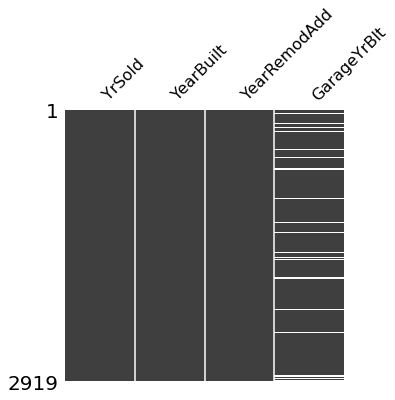

In [ ]:
fig, ax = plt.subplots(figsize= (5,5))
mno.matrix(alldata[yearInfo], ax= ax)

As can be seen in the missing matrix above, the missing value only found in GarageYrBuilt. There are two possible causes; the house has no garage, or there is no input. 

In [ ]:
temp = alldata['GarageYrBlt'].isna()
alldata['GarageArea'][temp]

train  39      0.0
       48      0.0
       78      0.0
       88      0.0
       89      0.0
              ... 
test   1433    0.0
       1449    0.0
       1453    0.0
       1454    0.0
       1457    0.0
Name: GarageArea, Length: 159, dtype: float64

It can be seen that there are houses with no garage. For this, missing value in GarageYrBlt will be filled by 0. But, as there is one value which is NaN, manual input will be performed by using the YearRemodAdd value

In [ ]:
temp1 = alldata['GarageArea'][temp] > 0
alldata[yearInfo][temp][temp1]

,,YrSold,YearBuilt,YearRemodAdd,GarageYrBlt
test,666,2008,1910,1983,NaN


In [ ]:
temp2 = alldata[temp][temp1].index
alldata.loc[temp2, 'GarageYrBlt'] = alldata.loc[temp2, 'YearRemodAdd']

In [ ]:

alldata[yearInfo][temp][temp1]

,,YrSold,YearBuilt,YearRemodAdd,GarageYrBlt
test,666,2008,1910,1983,1983.0


Other missing value in GarageYrBlt will be replaced by 0

In [ ]:
temp = alldata['GarageYrBlt'].isna()
alldata.loc[temp, 'GarageYrBlt'] = 0
alldata.loc[temp, 'GarageYrBlt']

train  39      0.0
       48      0.0
       78      0.0
       88      0.0
       89      0.0
              ... 
test   1433    0.0
       1449    0.0
       1453    0.0
       1454    0.0
       1457    0.0
Name: GarageYrBlt, Length: 158, dtype: float64

### 2.2.3 Ordinal encoding 
Qualitative information such as Excelent, Good, Fair, etc will be quantified in a numerical information.

In [ ]:
ordinalVar = ['OverallQual', 'OverallCond', 'ExterQual', 'ExterCond', 'BsmtQual', 
              'BsmtCond', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageQual',
              'GarageCond', 'PoolQC']

alldata[ordinalVar]

OverallQual  OverallCond ExterQual ExterCond BsmtQual BsmtCond  \
train 0               7            5        Gd        TA       Gd       TA   
      1               6            8        TA        TA       Gd       TA   
      2               7            5        Gd        TA       Gd       TA   
      3               7            5        TA        TA       TA       Gd   
      4               8            5        Gd        TA       Gd       TA   
...                 ...          ...       ...       ...      ...      ...   
test  1454            4            7        TA        TA       TA       TA   
      1455            4            5        TA        TA       TA       TA   
      1456            5            7        TA        TA       TA       TA   
      1457            5            5        TA        TA       Gd       TA   
      1458            7            5        TA        TA       Gd       TA   

           HeatingQC KitchenQual FireplaceQu GarageQual GarageCond PoolQC  
train 0           Ex          Gd         NaN         TA         TA    NaN  
      1           Ex          TA          TA         TA         TA    NaN  
      2           Ex          Gd          TA         TA         TA    NaN  
      3           Gd          Gd          Gd         TA         TA    NaN  
      4           Ex          Gd          TA         TA         TA    NaN  
...              ...         ...         ...        ...        ...    ...  
test  1454        Gd          TA         NaN        NaN        NaN    NaN  
      1455        TA          TA         NaN         TA         TA    NaN  
      1456        Ex          TA          TA         TA         TA    NaN  
      1457        TA          TA         NaN        NaN        NaN    NaN  
      1458        Ex          TA          TA         TA         TA    NaN  

[2919 rows x 12 columns]

Quality scoring follows the scoring category as mentioned in data description for OverallQual and OverallCond

In [ ]:
quality = ['Ex', 'Gd', 'TA', 'Fa', 'Po']
qualScore = [9, 7, 5, 3, 2]

qualConvert = dict(zip(quality, qualScore))
qualConvert

{'Ex': 9, 'Gd': 7, 'TA': 5, 'Fa': 3, 'Po': 2}

In [ ]:
alldata[ordinalVar] = alldata[ordinalVar].replace(qualConvert)
alldata[ordinalVar]

OverallQual  OverallCond  ExterQual  ExterCond  BsmtQual  \
train 0               7            5          7          5       7.0   
      1               6            8          5          5       7.0   
      2               7            5          7          5       7.0   
      3               7            5          5          5       5.0   
      4               8            5          7          5       7.0   
...                 ...          ...        ...        ...       ...   
test  1454            4            7          5          5       5.0   
      1455            4            5          5          5       5.0   
      1456            5            7          5          5       5.0   
      1457            5            5          5          5       7.0   
      1458            7            5          5          5       7.0   

            BsmtCond  HeatingQC  KitchenQual  FireplaceQu  GarageQual  \
train 0          5.0          9          7.0          NaN         5.0   
      1          5.0          9          5.0          5.0         5.0   
      2          5.0          9          7.0          5.0         5.0   
      3          7.0          7          7.0          7.0         5.0   
      4          5.0          9          7.0          5.0         5.0   
...              ...        ...          ...          ...         ...   
test  1454       5.0          7          5.0          NaN         NaN   
      1455       5.0          5          5.0          NaN         5.0   
      1456       5.0          9          5.0          5.0         5.0   
      1457       5.0          5          5.0          NaN         NaN   
      1458       5.0          9          5.0          5.0         5.0   

            GarageCond  PoolQC  
train 0            5.0     NaN  
      1            5.0     NaN  
      2            5.0     NaN  
      3            5.0     NaN  
      4            5.0     NaN  
...                ...     ...  
test  1454         NaN     NaN  
      1455         5.0     NaN  
      1456         5.0     NaN  
      1457         NaN     NaN  
      1458         5.0     NaN  

[2919 rows x 12 columns]

### 2.2.4 Missing Value

c:\users\user\appdata\local\programs\python\python38-32\lib\site-packages\missingno\missingno.py:60: UserWarning: Plotting a sparkline on an existing axis is not currently supported. To remove this warning, set sparkline=False.
  warnings.warn(


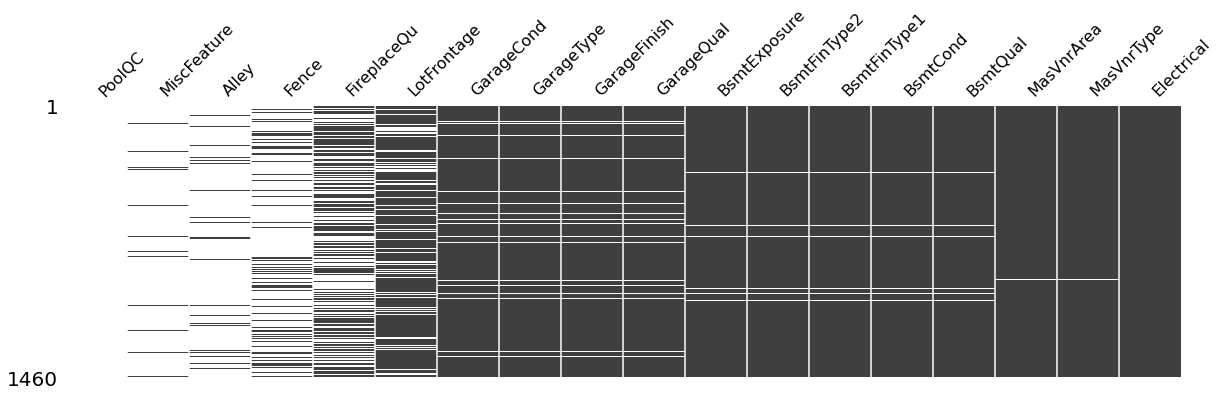

In [ ]:
temp = alldata.loc['train'].isna().sum().sort_values(ascending= False)
temp = temp[temp>0].index

fig, ax = plt.subplots(figsize= (20, 5))
mno.matrix(alldata.loc['train'][temp], ax= ax)

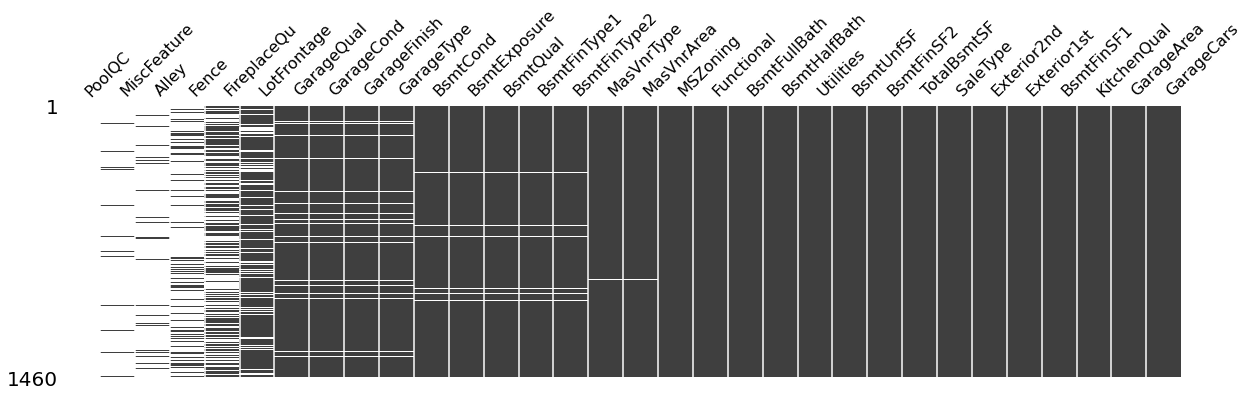

In [ ]:
temp = alldata.loc['test'].isna().sum().sort_values(ascending= False)
temp = temp[temp>0].index

fig, ax = plt.subplots(figsize= (20, 5))
mno.matrix(alldata.loc['train'][temp], ax= ax)

Based on the missing value mapping, it can be seen that PoolQC, MiscFeature, Alley, Fence and FireplaceQu are variables with most missing values. Thus, those variables will be dropped. 
- For pool, there are area and quality information. There are houses with pool, but have no QC information. 

Compare:

temp = alldata['PoolArea']  |  temp[temp>0]

temp = alldata['PoolQC'].isna()  |  alldata['PoolArea'][-temp]

- For fireplace. It is checked that the FireplaceQu missing value only appears on those with no fireplace. 

temp = ['OverallQual', 'OverallCond', 'FireplaceQu', 'Fireplaces']

temp1 = alldata['FireplaceQu'].isna()
temp2 = alldata['Fireplaces']>0

?# Select all data 
alldata[temp][temp1 & temp2]

### 2.2.5 Drop variables with high missing value

In [ ]:
dropVar = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu']

alldata.drop(dropVar, axis= 1, inplace= True)
alldata.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPo

### 2.2.6 Imputation
#### *2.2.6.1 LotFrontage*
Missing values is replaced by aggregate value considering the LotConfig

In [ ]:
temp = alldata['LotFrontage'].isna()
temp1 = alldata[['LotFrontage', 'LotConfig']][-temp]
temp2 = alldata['LotConfig'].unique()
temp3 = temp1.groupby(by= 'LotConfig').mean()

In [ ]:
for x in range(len(temp2)):
    a = (alldata['LotFrontage'].isna()) & (alldata['LotConfig'] == temp2[x])
    alldata['LotFrontage'].loc[a] = temp3.loc[temp2[x],'LotFrontage']

c:\users\user\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


#### *2.2.6.2 Garage*

Missing values are found in:
- GarageCond
- GarageQual
- GarageType
- GarageFinish

Exploration note: 
- Act-1: It is found that almost all the missing values is caused due to no garage in the house. No garage will be assume with 0 value for 4 variables above
- Act-2: GarageCond and GarageQual will be replaced by its OverallCond and OverallQual if only the house has Garage
- Act-3: GarageFinish will be assumed as RoughFinished as the average value of OverallCond and OverallQual is 7.

**Act-2**

In [ ]:
temp = ['OverallCond', 'OverallQual','GarageCond', 'GarageQual', 'GarageFinish', 
        'GarageType', 'GarageArea']
temp1 = (alldata['GarageCond'].isna())
temp2 = alldata['GarageArea'] >0
temp3 = alldata[temp].loc[temp1 & temp2]
temp3

,,OverallCond,OverallQual,GarageCond,GarageQual,GarageFinish,GarageType,GarageArea
test,666,8,6,NaN,NaN,NaN,Detchd,360.0


**Act-3**

In [ ]:
alldata['GarageCond'].loc[temp1 & temp2] = alldata['OverallCond'].loc[temp1 & temp2]
alldata['GarageQual'].loc[temp1 & temp2] = alldata['OverallQual'].loc[temp1 & temp2]
alldata['GarageFinish'].loc[temp1 & temp2] = 'RFn'

c:\users\user\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [ ]:
temp3 = alldata[temp].loc[temp1 & temp2]
temp3

,,OverallCond,OverallQual,GarageCond,GarageQual,GarageFinish,GarageType,GarageArea
test,666,8,6,8.0,6.0,RFn,Detchd,360.0


**Action-1: Replace NA with 0 value**

In [ ]:
temp = ['GarageCond', 'GarageQual', 'GarageFinish', 'GarageType']

for x in temp:
    alldata[x].fillna(0, inplace= True)

In [ ]:
alldata[temp].isna().sum()

GarageCond      0
GarageQual      0
GarageFinish    0
GarageType      0
dtype: int64

**Action-1: Replace NA with 0 value on no GarageArea and cars**

In [ ]:
temp = ['OverallCond', 'OverallQual','GarageCond', 'GarageQual', 'GarageFinish', 
        'GarageType', 'GarageArea', 'GarageCars']
temp1 = alldata['GarageCars'].isna()

alldata.loc[temp1, temp]

,,OverallCond,OverallQual,GarageCond,GarageQual,GarageFinish,GarageType,GarageArea,GarageCars
test,1116,6,5,0.0,0.0,0,Detchd,NaN,NaN


In [ ]:
temp = ['GarageCars', 'GarageArea']

for x in temp:
    alldata[x].fillna(0, inplace= True)

#### *2.2.6.2 Basement*

Missing value exploration note:
- Basement FinSF1 and FinSF2 not all filled. To identify if the house has basement, Total Basement SF is more reliable.
- Act-1 There are rows with BsmtCond NaN value but has basement area. It is assumed that the BsmtCond is equal to OverallCond
- Act-2 There is one row in train data that has BsmtFinSF2 but no BsmtFinType2. It is assumed that the FinType2 is equal to FinType1
- Act-3 Rows with basement but no Basement Exposure. It is assumed considering the all have BsmtCond value of 5(Slight dampness). It is assumed that all missing value is equal to minimum exposure. 
- Act-4 There are rows with BsmtQual NaN value but has basement area. It is assumed that the BsmtQual is equal to OverallQual
- There is one row with missing total basement area. It is confirmed that the house information shows no indication of Basement existance.

Action performed after missing value processed:
- Replace NaN with value of 0

**Action-1: BsmtCond on houses which has basement**

In [ ]:
temp = ['OverallQual', 'OverallCond', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 
        'BsmtFinSF1', 'BsmtFinType2','BsmtFinSF2', 'BsmtQual', 'TotalBsmtSF']
temp1 = alldata['BsmtCond'].isna()
temp2 = alldata['TotalBsmtSF'] > 0

alldata[temp].loc[temp1 & temp2]

OverallQual  OverallCond  BsmtCond BsmtExposure BsmtFinType1  \
test 580             8            9       NaN           Mn          GLQ   
     725             6            6       NaN           No          BLQ   
     1064            5            7       NaN           Av          ALQ   

           BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtQual  TotalBsmtSF  
test 580       1044.0          Rec       382.0       7.0       1426.0  
     725       1033.0          Unf         0.0       5.0       1127.0  
     1064       755.0          Unf         0.0       5.0        995.0

In [ ]:
alldata['BsmtCond'].loc[temp1 & temp2] = alldata['OverallCond'].loc[temp1 & temp2]

c:\users\user\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


**Action-2: BsmtFinType2 which has BsmtFinSF2**

In [ ]:
temp1 = alldata['BsmtFinType2'].isna()
temp2 = ((alldata['TotalBsmtSF']) > 0)
alldata[temp].loc[temp1 & temp2]

,,OverallQual,OverallCond,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtQual,TotalBsmtSF
train,332,8,5,5.0,No,GLQ,1124.0,NaN,479.0,7.0,3206.0


In [ ]:
alldata['BsmtFinType2'].loc[temp1 & temp2] = alldata['BsmtFinType1'].loc[temp1 & temp2]

c:\users\user\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


**Action-3: BsmtExposure assumed by BsmtCond**

In [ ]:
temp = ['OverallQual', 'OverallCond', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 
        'BsmtFinSF1', 'BsmtFinType2','BsmtFinSF2', 'BsmtQual', 'TotalBsmtSF']
temp1 = alldata['BsmtExposure'].isna()
temp2 = alldata['TotalBsmtSF'] > 0

alldata[temp].loc[temp1 & temp2]

OverallQual  OverallCond  BsmtCond BsmtExposure BsmtFinType1  \
train 948            7            5       5.0          NaN          Unf   
test  27             8            5       5.0          NaN          Unf   
      888            5            5       5.0          NaN          Unf   

           BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtQual  TotalBsmtSF  
train 948         0.0          Unf         0.0       7.0        936.0  
test  27          0.0          Unf         0.0       7.0       1595.0  
      888         0.0          Unf         0.0       7.0        725.0

In [ ]:
alldata['BsmtExposure'].loc[temp1 & temp2] = 'Mn'

c:\users\user\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


**Action-4: BsmtQual assumed by OverallQual**

In [ ]:
temp = ['OverallQual', 'OverallCond', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 
        'BsmtFinSF1', 'BsmtFinType2','BsmtFinSF2', 'BsmtQual', 'TotalBsmtSF']
temp1 = alldata['BsmtQual'].isna()
temp2 = alldata['TotalBsmtSF'] > 0

alldata[temp].loc[temp1 & temp2]

OverallQual  OverallCond  BsmtCond BsmtExposure BsmtFinType1  \
test 757            4            7       3.0           No          Unf   
     758            4            7       5.0           No          Unf   

          BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtQual  TotalBsmtSF  
test 757         0.0          Unf         0.0       NaN        173.0  
     758         0.0          Unf         0.0       NaN        356.0

In [ ]:
alldata['BsmtQual'].loc[temp1 & temp2] = alldata['OverallQual'].loc[temp1 & temp2]

c:\users\user\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


**Missing value on TotalBsmtSF**

In [ ]:
temp = ['OverallQual', 'OverallCond', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 
        'BsmtFinSF1', 'BsmtFinType2','BsmtFinSF2', 'BsmtQual', 'TotalBsmtSF']
temp1 = alldata['TotalBsmtSF'].isna()

alldata[temp].loc[temp1]

,,OverallQual,OverallCond,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtQual,TotalBsmtSF
test,660,4,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
alldata['TotalBsmtSF'].loc[temp1] = 0

c:\users\user\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


**Next Process: Fill NA value with 0**

In [ ]:
alldata[temp].isna().sum()

OverallQual      0
OverallCond      0
BsmtCond        79
BsmtExposure    79
BsmtFinType1    79
BsmtFinSF1       1
BsmtFinType2    79
BsmtFinSF2       1
BsmtQual        79
TotalBsmtSF      0
dtype: int64

In [ ]:
temp = ['OverallQual', 'OverallCond', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 
        'BsmtFinSF1', 'BsmtFinType2','BsmtFinSF2', 'BsmtQual', 'TotalBsmtSF']

for x in temp:
    alldata[x].fillna(0, inplace= True)

#### *2.2.6.3 Other Missing Values*

In [ ]:
alldata.isna().sum().sort_values(ascending= False).head(16)

MasVnrType      24
MasVnrArea      23
MSZoning         4
Functional       2
BsmtHalfBath     2
BsmtFullBath     2
Utilities        2
KitchenQual      1
Exterior1st      1
Exterior2nd      1
Electrical       1
SaleType         1
BsmtUnfSF        1
ExterCond        0
ExterQual        0
Foundation       0
dtype: int64

c:\users\user\appdata\local\programs\python\python38-32\lib\site-packages\missingno\missingno.py:60: UserWarning: Plotting a sparkline on an existing axis is not currently supported. To remove this warning, set sparkline=False.
  warnings.warn(


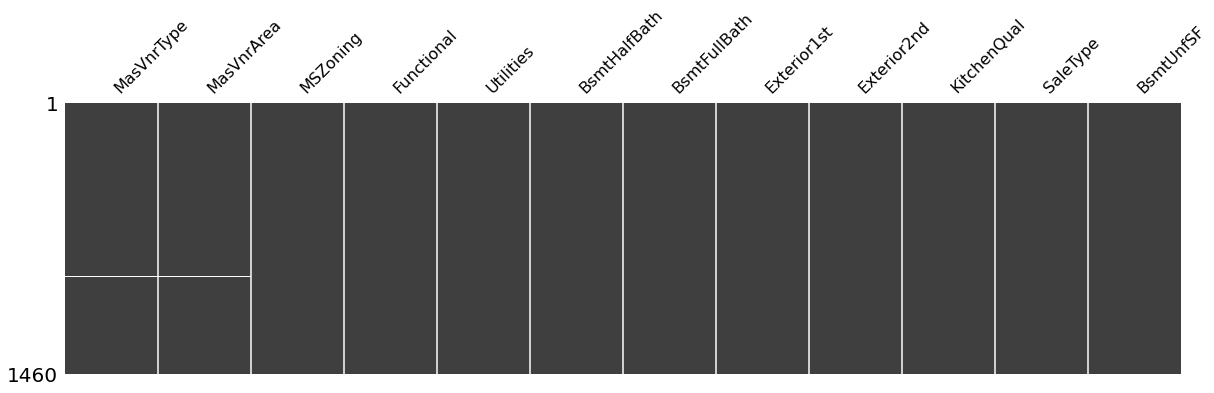

In [ ]:
temp = alldata.loc['test'].isna().sum().sort_values(ascending= False)
temp = temp[temp>0].index

fig, ax = plt.subplots(figsize= (20, 5))
mno.matrix(alldata.loc['train'][temp], ax= ax)

#### *Masonry*
Exploration note:
- There is row with MasVnrArea but no type. It will be assumed by the mode. At the moment, input is done manually.
- Other missing value will be replaced by 0 

In [ ]:
temp = ['MasVnrType', 'MasVnrArea']
temp1 = alldata['MasVnrType'].isna()
temp2 = alldata['MasVnrArea'] > 0 
alldata[temp].loc[temp1 & temp2]

,,MasVnrType,MasVnrArea
test,1150,NaN,198.0


In [ ]:
temp3 = alldata['MasVnrType'] == 'None'
alldata.loc[-temp3,'MasVnrType'].mode()

0    BrkFace
dtype: object

In [ ]:
temp = ['MasVnrType', 'MasVnrArea']
temp1 = (alldata['MasVnrType'].isna())
temp2 = (alldata['MasVnrArea'] > 0) 

alldata.loc[temp1 & temp2, 'MasVnrType'] = 'BrkFace'

In [ ]:
temp = ['MasVnrType', 'MasVnrArea']

for x in temp:
    alldata[x].fillna(0, inplace= True)

#### *Other missing value will be replaced by mode*

In [ ]:
temp = alldata.isna().sum()
temp = temp[temp>0].index

for x in temp:
    temp1 = alldata[x].isna()
    temp2 = alldata[x].mode().values[0]
    alldata[x].fillna(temp2, inplace= True)

In [ ]:
# Ensure no more missing value
alldata.isna().sum().sum()

0

### 2.2.3 PreProcessing
At this point, "Alldata" has no missing value. Preprocessing is performed to produce a "*good*" data input to the model, which the method used is subjective to the analyst depending on personal preference and knowledge. Further exploration is also taken to justify the processing activity.

#### 2.2.3.1 Sale Price
Exploration note:
- SalePrice data distribution has a positive skewness, with a value of 1.88. Log operation can reduce the skewness to 0.12. The acceptable skewness range is +- 0.5
- Need to be noted that the log transformed saleprice will estimate sale price value in log form. Reverse tranform must be performed for the prediction value. 

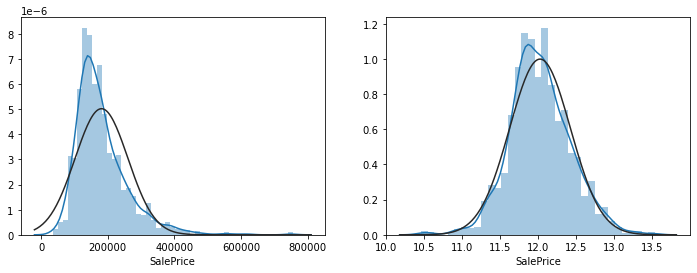

In [ ]:
train_price = train['SalePrice']

fig, ax = plt.subplots(1, 2, figsize= (12,4))

sns.distplot(train_price, fit= stats.norm, ax= ax[0])
sns.distplot(np.log(train_price), fit= stats.norm, ax= ax[1])

In [ ]:
train_price = np.log(train_price)

### 2.2.3.2 Object data
Exploration note:
- MSSubClass is a categorical information.
- One hot encoding performed on alldata_cat as there are cases that the test data contain variables which are not mentioned in train data.

#### One Hot Encoding

In [ ]:
alldata['MSSubClass'] = alldata['MSSubClass'].astype('object', copy=False)
alldata_cat = pd.get_dummies(alldata.select_dtypes('object'))

In [ ]:
train_cat = pd.concat((alldata_cat.loc['train'], train_price), axis=1)
train_cat

,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,...,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SalePrice
0,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,12.247694
1,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,12.109011
2,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,12.317167
3,0,0,0,0,0,0,1,0,0,0,...,0,0,1,1,0,0,0,0,0,11.849398
4,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,12.429216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,12.072541
1456,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,12.254863
1457,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,12.493130
1458,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,11.864462


In [ ]:
train_var_corr = train_cat.corr()['SalePrice'].sort_values(ascending= False)
train_var_corr

SalePrice            1.000000
Foundation_PConc     0.530840
BsmtFinType1_GLQ     0.440763
GarageFinish_Fin     0.418881
GarageType_Attchd    0.415787
                       ...   
CentralAir_N        -0.351600
GarageType_Detchd   -0.388638
MasVnrType_None     -0.395389
GarageFinish_Unf    -0.432011
MSSubClass_150            NaN
Name: SalePrice, Length: 221, dtype: float64

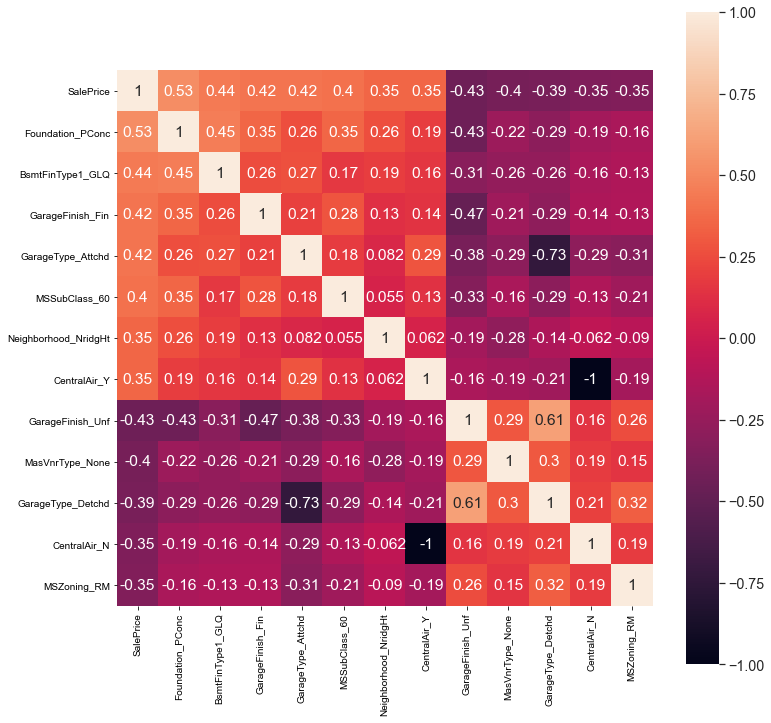

In [ ]:
# Get the 13 most correlated (negative or positive)
temp = pd.concat((train_var_corr.nlargest(8), train_var_corr.nsmallest(5)),
                 axis= 0)
temp = temp.index

temp1 = np.corrcoef(train_cat[temp].values.T)


fig, ax = plt.subplots(figsize = (12,12))
sns.set(font_scale= 1.3)
sns.heatmap(data= temp1,
           xticklabels= temp,
           yticklabels= temp,
           annot= True,
           square= True)

In [ ]:
train_selected_object = temp
train_selected_object = train_selected_object.drop('SalePrice')

In [ ]:
alldata_cat[train_selected_object]

Foundation_PConc  BsmtFinType1_GLQ  GarageFinish_Fin  \
train 0                    1                 1                 0   
      1                    0                 0                 0   
      2                    1                 1                 0   
      3                    0                 0                 0   
      4                    1                 1                 0   
...                      ...               ...               ...   
test  1454                 0                 0                 0   
      1455                 0                 0                 0   
      1456                 0                 0                 0   
      1457                 1                 1                 0   
      1458                 1                 0                 1   

            GarageType_Attchd  MSSubClass_60  Neighborhood_NridgHt  \
train 0                     1              1                     0   
      1                     1              0                     0   
      2                     1              1                     0   
      3                     0              0                     0   
      4                     1              1                     0   
...                       ...            ...                   ...   
test  1454                  0              0                     0   
      1455                  0              0                     0   
      1456                  0              0                     0   
      1457                  0              0                     0   
      1458                  1              1                     0   

            CentralAir_Y  GarageFinish_Unf  MasVnrType_None  \
train 0                1                 0                0   
      1                1                 0                1   
      2                1                 0                0   
      3                1                 1                1   
      4                1                 0                0   
...                  ...               ...              ...   
test  1454             1                 0                1   
      1455             1                 1                1   
      1456             1                 1                1   
      1457             1                 0                1   
      1458             1                 0                0   

            GarageType_Detchd  CentralAir_N  MSZoning_RM  
train 0                     0             0            0  
      1                     0             0            0  
      2                     0             0            0  
      3                     1             0            0  
      4                     0             0            0  
...                       ...           ...          ...  
test  1454                  0             0            1  
      1455                  0             0            1  
      1456                  1             0            0  
      1457                  0             0            0  
      1458                  0             0            0  

[2919 rows x 12 columns]

### 2.2.3.3 Non Object data

Exploration note:


In [ ]:
alldata_num = alldata.select_dtypes(exclude= 'object')
alldata_num

Id  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
train 0        1         65.0     8450            7            5       2003   
      1        2         80.0     9600            6            8       1976   
      2        3         68.0    11250            7            5       2001   
      3        4         60.0     9550            7            5       1915   
      4        5         84.0    14260            8            5       2000   
...          ...          ...      ...          ...          ...        ...   
test  1454  2915         21.0     1936            4            7       1970   
      1455  2916         21.0     1894            4            5       1970   
      1456  2917        160.0    20000            5            7       1960   
      1457  2918         62.0    10441            5            5       1992   
      1458  2919         74.0     9627            7            5       1993   

            YearRemodAdd  MasVnrArea  ExterQual  ExterCond  ...  GarageCond  \
train 0             2003       196.0          7          5  ...         5.0   
      1             1976         0.0          5          5  ...         5.0   
      2             2002       162.0          7          5  ...         5.0   
      3             1970         0.0          5          5  ...         5.0   
      4             2000       350.0          7          5  ...         5.0   
...                  ...         ...        ...        ...  ...         ...   
test  1454          1970         0.0          5          5  ...         0.0   
      1455          1970         0.0          5          5  ...         5.0   
      1456          1996         0.0          5          5  ...         5.0   
      1457          1992         0.0          5          5  ...         0.0   
      1458          1994        94.0          5          5  ...         5.0   

            WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
train 0              0           61              0          0            0   
      1            298            0              0          0            0   
      2              0           42              0          0            0   
      3              0           35            272          0            0   
      4            192           84              0          0            0   
...                ...          ...            ...        ...          ...   
test  1454           0            0              0          0            0   
      1455           0           24              0          0            0   
      1456         474            0              0          0            0   
      1457          80           32              0          0            0   
      1458         190           48              0          0            0   

            PoolArea  MiscVal  MoSold  YrSold  
train 0            0        0       2    2008  
      1            0        0       5    2007  
      2            0        0       9    2008  
      3            0        0       2    2006  
      4            0        0      12    2008  
...              ...      ...     ...     ...  
test  1454         0        0       6    2006  
      1455         0        0       4    2006  
      1456         0        0       9    2006  
      1457         0      700       7    2006  
      1458         0        0      11    2006  

[2919 rows x 44 columns]

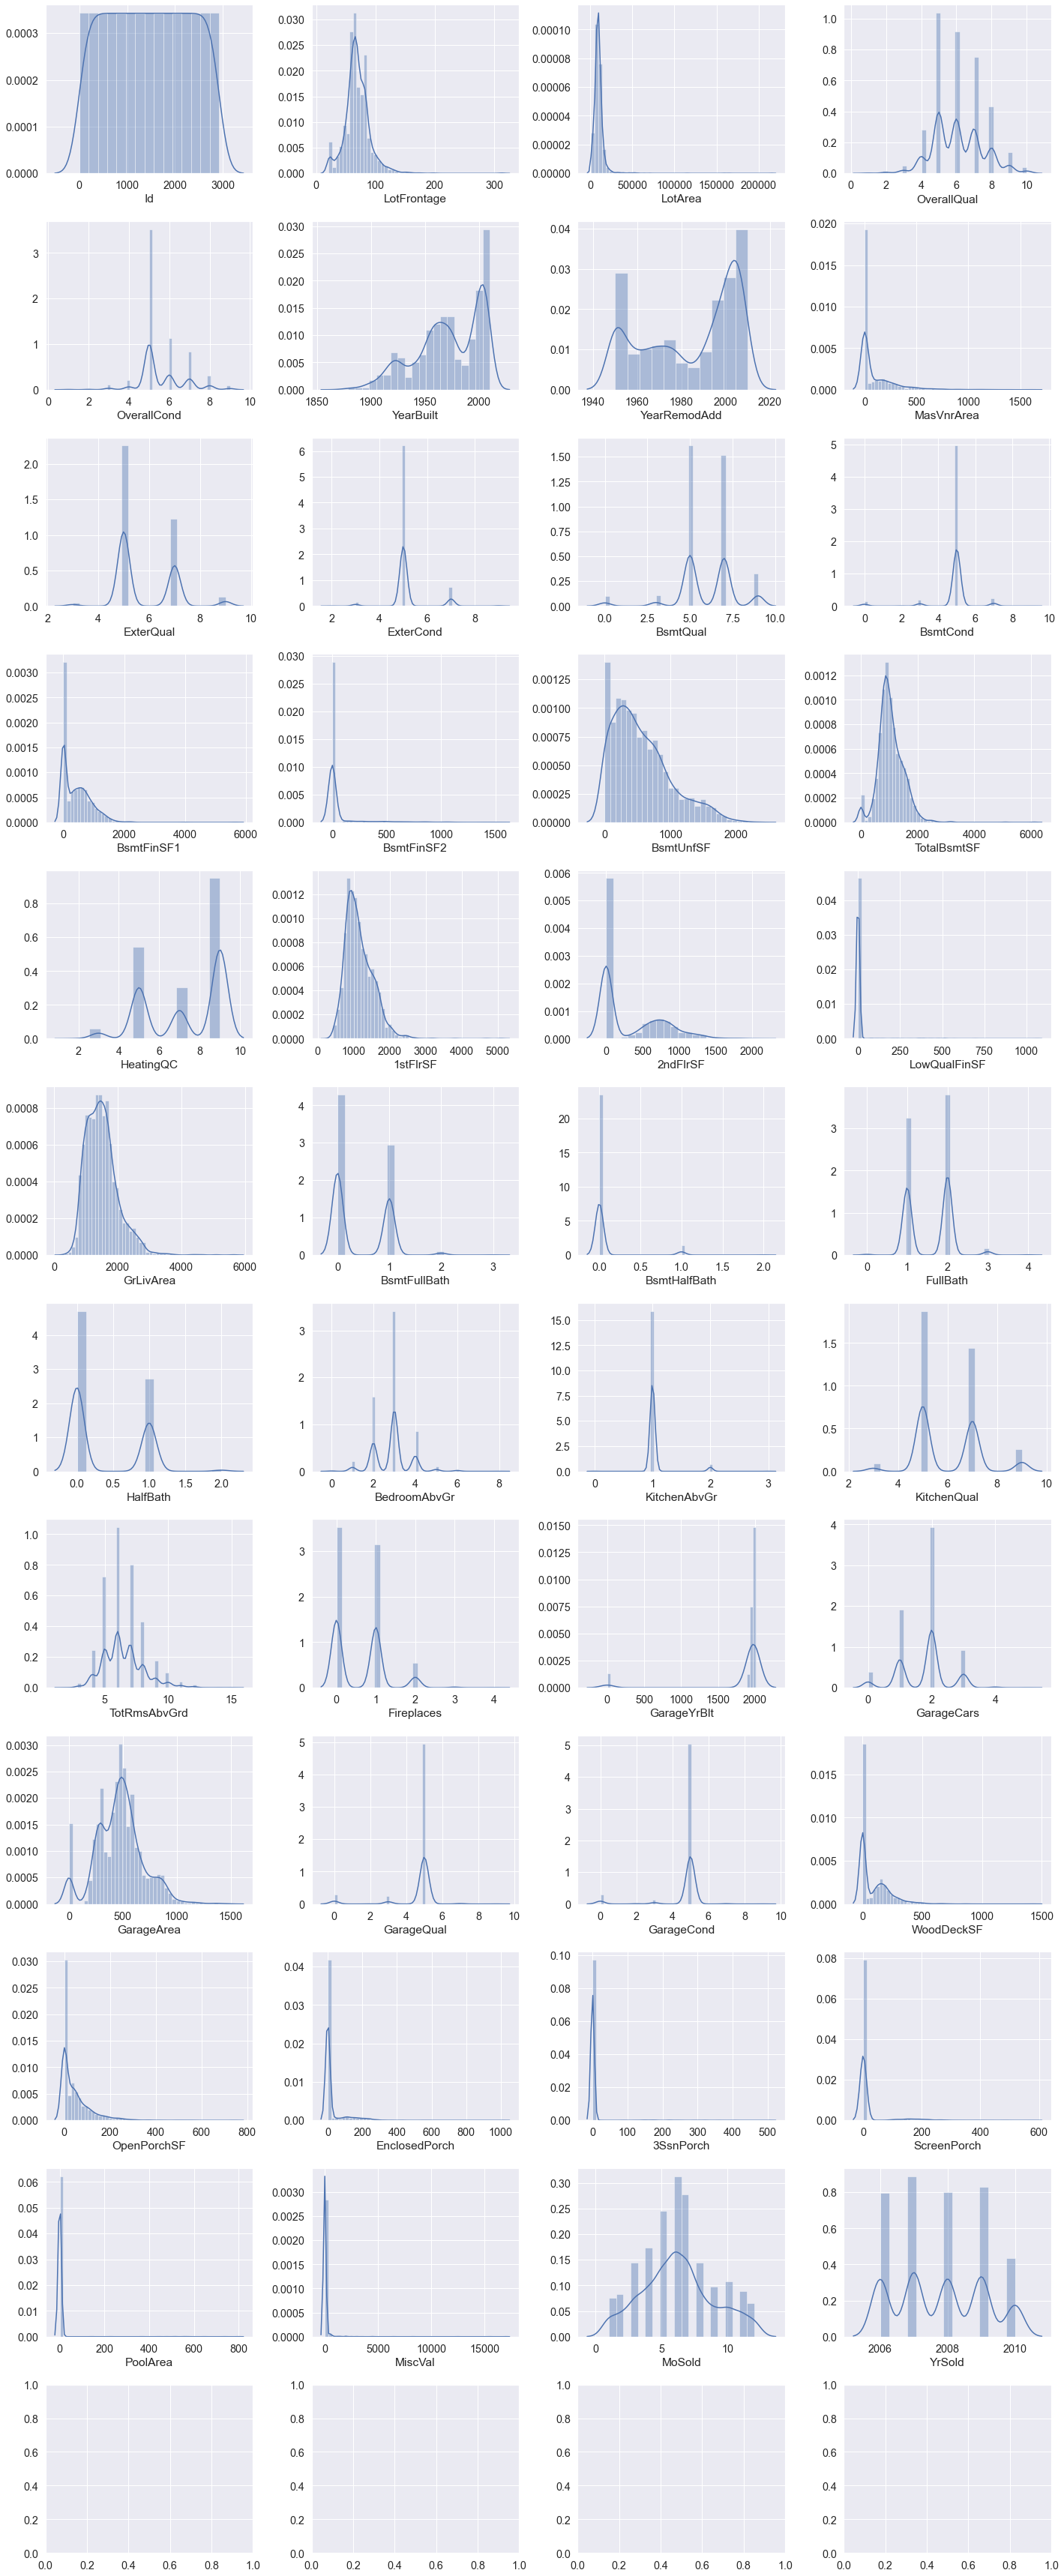

In [ ]:
temp = alldata_num.columns

a = 4
b = len(temp) // a + 1

fig, ax = plt.subplots(b,a, figsize= (a*5, b*4))
ax = ax.reshape(a*b)

for x in range(len(temp)):
    sns.distplot(alldata_num[temp[x]], ax= ax[x])
    
plt.tight_layout()

In [ ]:
temp = alldata_num.columns
temp1 = alldata_num.skew().values
temp2 = np.log(alldata_num[temp]).skew().values

alldata_num_corr = pd.DataFrame({'Val': temp,
                                 'Origin': temp1,
                                 'LogValue': temp2})
alldata_num_corr.set_index('Val', inplace= True)

<ipython-input-58-d4a454c85b79>:3: RuntimeWarning: divide by zero encountered in log
  temp2 = np.log(alldata_num[temp]).skew().values


In [ ]:
num_drop = ['Id', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2',
            '2ndFlrSF', 'LowQualFinSF', 'BedroomAbvGr', 'GarageYrBlt', 'GarageCars',
            'GarageQual', 'GarageCond', 'PoolArea', 'MiscVal', 'BsmtQual', 'BsmtCond']

alldata_num_corr.drop(index= num_drop)
alldata_num.drop(num_drop, axis=1, inplace= True)

alldata_num_corr

c:\users\user\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Origin,LogValue
Val,,
Id,0.000000,-1.923216
LotFrontage,1.603913,-0.987587
LotArea,12.829025,-0.505542
OverallQual,0.197212,-0.994161
OverallCond,0.570605,-1.408074
YearBuilt,-0.600114,-0.626551
YearRemodAdd,-0.451252,-0.458397
MasVnrArea,2.614936,NaN
ExterQual,0.786786,0.299007


In [ ]:
# Merge
temp = ['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath']

# Merge and one hot encoding
temp1 = ['OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch']

# Transform
temp2 = ['LotFrontage', 'LotArea', 'ExterCond', '1stFlrSF', 'GrLivArea',
        'TotRmsAbvGrd']
temp3 = ['BsmtUnfSF', 'TotalBsmtSF']

# Leave as it is
temp4 = ['OverallCond', 'OverallQual', 'GarageArea', 'MoSold', 'YrSold', 
         'ExterQual', 'HeatingQC', 'KitchenQual']

# One hot enconding
temp5 = ['MasVnrArea', 'KitchenAbvGr', 'Fireplaces', 'WoodDeckSF']

In [ ]:
# Merge
temp = ['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath']

alldata_num['TotalBath'] = alldata_num['BsmtFullBath'] + alldata_num['FullBath'] + alldata_num['BsmtHalfBath']*0.5 + alldata_num['HalfBath']*0.5
alldata_num.drop(temp, axis= 1, inplace= True)

num_drop = num_drop + temp

<ipython-input-61-62586e9f9fdf>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alldata_num['TotalBath'] = alldata_num['BsmtFullBath'] + alldata_num['FullBath'] + alldata_num['BsmtHalfBath']*0.5 + alldata_num['HalfBath']*0.5
c:\users\user\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [ ]:
# Merge and one hot encoding
temp1 = ['OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch']

alldata_num['Porch'] = alldata_num[temp1].sum(axis=1)
alldata_num['Porch'] = alldata_num['Porch'].astype('bool').astype('int')

alldata_num.drop(temp1, axis = 1, inplace= True)

num_drop = num_drop + temp1

<ipython-input-62-5adf6f992b61>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alldata_num['Porch'] = alldata_num[temp1].sum(axis=1)
<ipython-input-62-5adf6f992b61>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alldata_num['Porch'] = alldata_num['Porch'].astype('bool').astype('int')


In [ ]:
# Transform
temp2 = ['LotFrontage', 'LotArea', 'ExterCond', '1stFlrSF', 'GrLivArea',
        'TotRmsAbvGrd']

alldata_num[temp2] = np.log(alldata_num[temp2])

c:\users\user\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [ ]:
temp3 = ['BsmtUnfSF', 'TotalBsmtSF']

alldata_num[temp3] = alldata_num[temp3]**0.5

In [ ]:
# One hot enconding
temp5 = ['MasVnrArea', 'KitchenAbvGr', 'Fireplaces', 'WoodDeckSF']

alldata_num[temp5]= alldata_num[temp5].astype('bool').astype('int')

In [ ]:
train_price

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1455    12.072541
1456    12.254863
1457    12.493130
1458    11.864462
1459    11.901583
Name: SalePrice, Length: 1460, dtype: float64

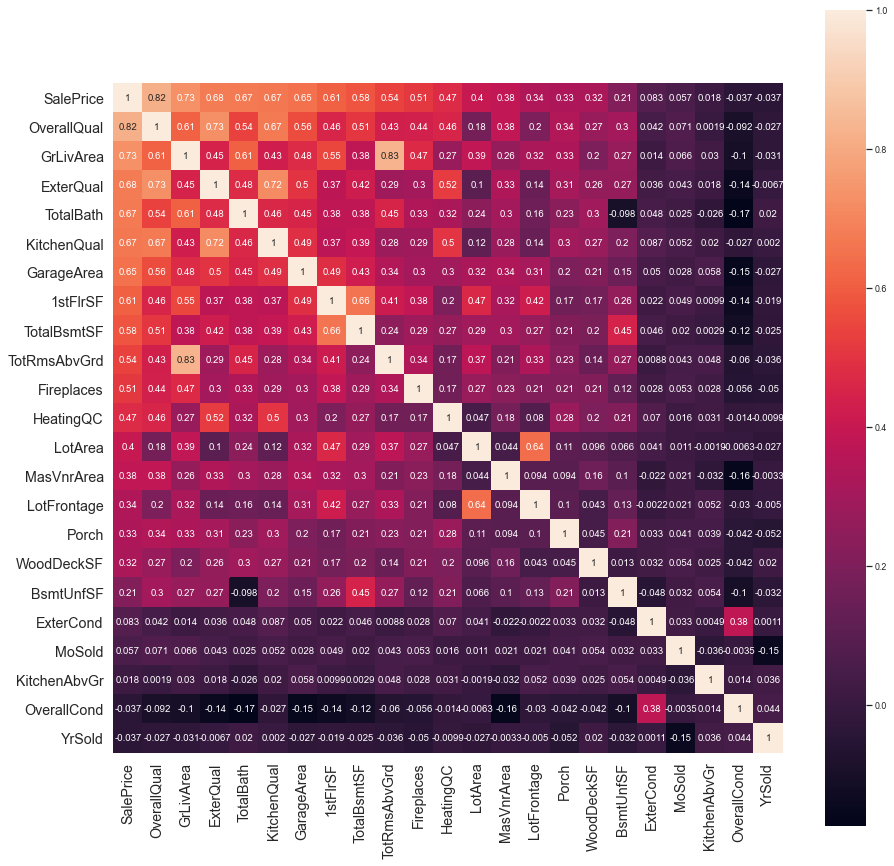

In [ ]:
temp = pd.concat((train_price, alldata_num.loc['train']), axis= 1)

temp1 = temp.corr()['SalePrice'].sort_values(ascending= False).index

temp2 = np.corrcoef(temp[temp1].values.T)

fig, ax = plt.subplots(figsize= (15,15))

sns.set(font_scale= 0.8)
sns.heatmap(temp2, 
           annot= True,
           square= True,
           xticklabels= temp1,
           yticklabels= temp1)

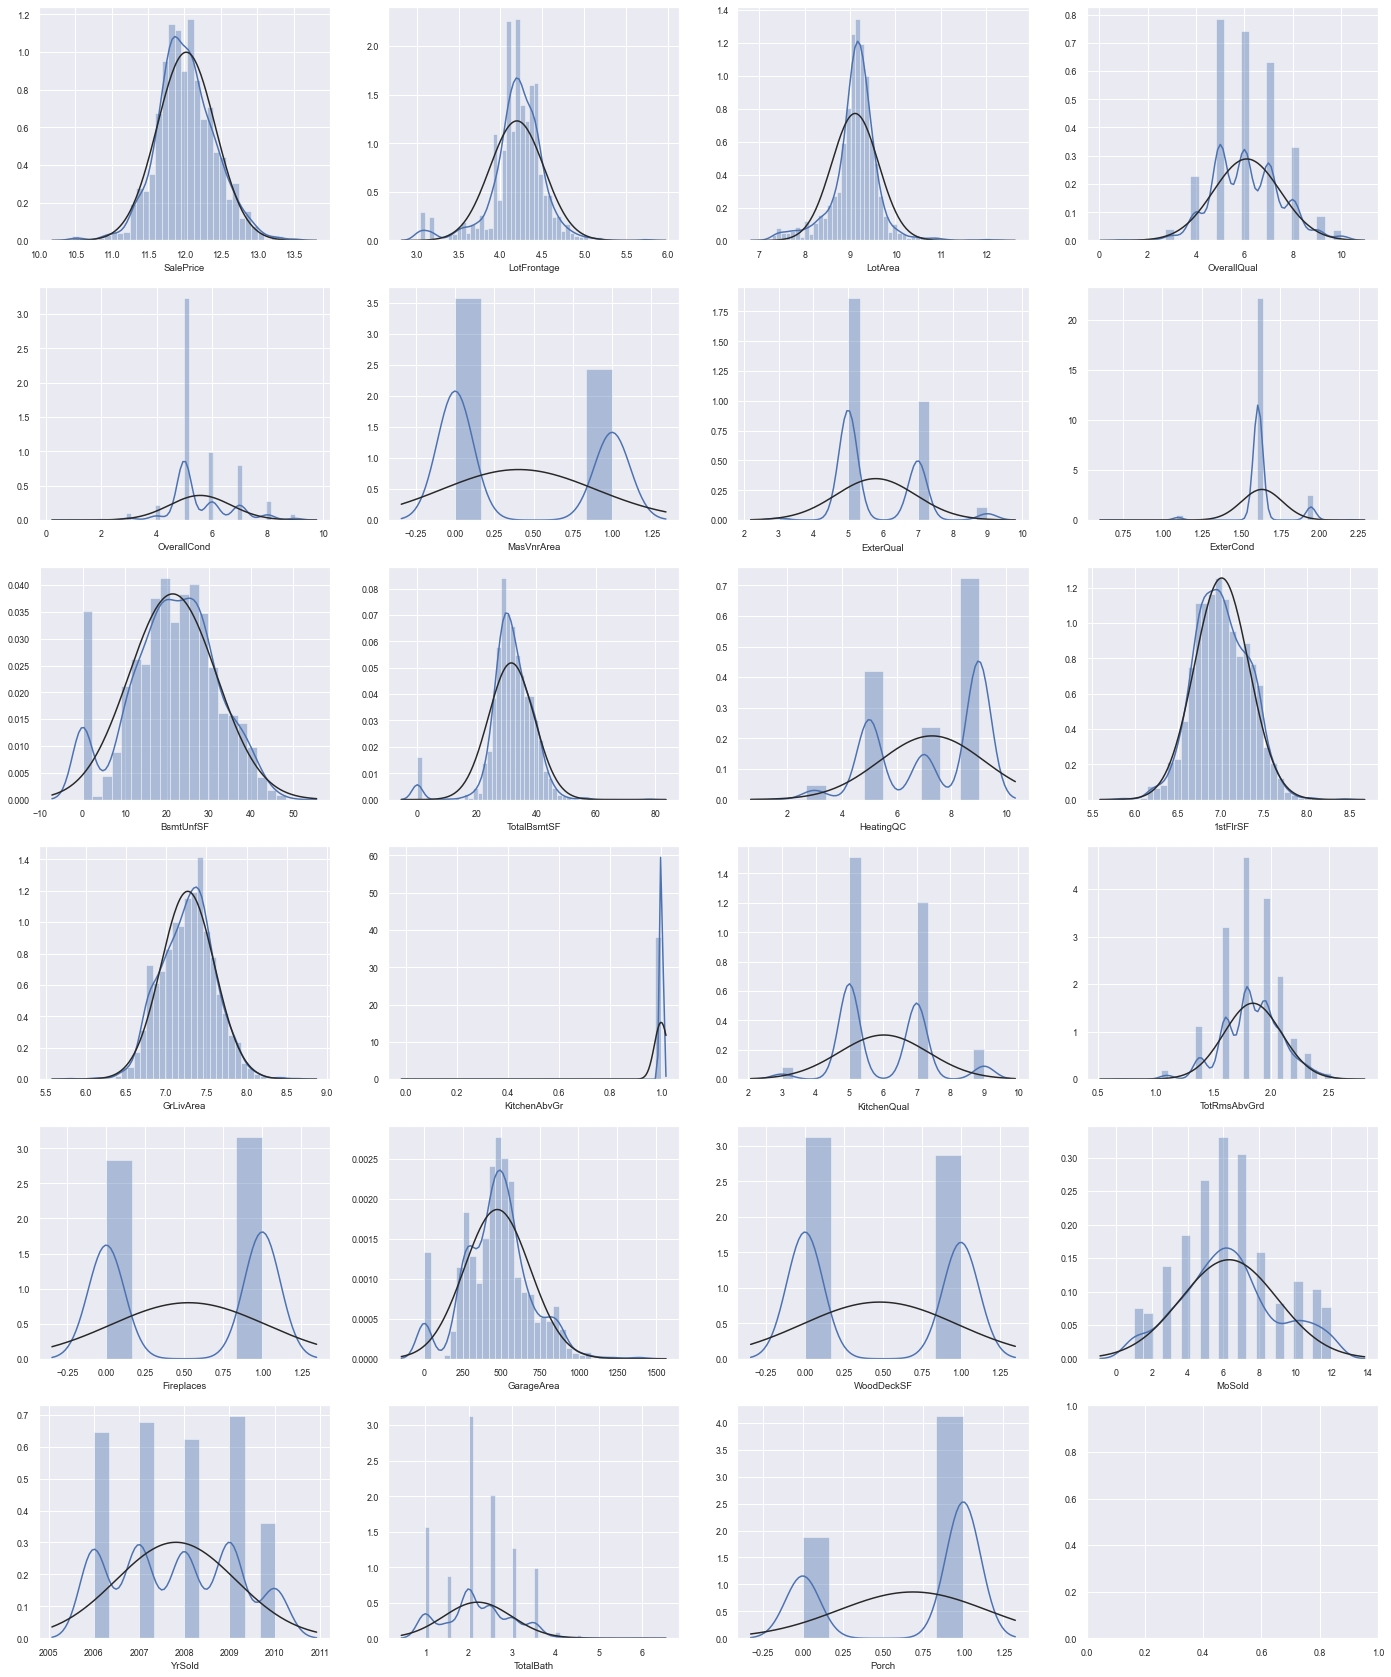

In [ ]:
a = 4
b = (len(temp.columns) // a) + 1

fig, ax = plt.subplots(nrows= b,
                      ncols= a,
                      figsize= (a*6, b*5))
ax = ax.reshape(a*b)

for x in range(len(temp.columns)):
    sns.distplot(temp[temp.columns[x]], ax= ax[x], fit= stats.norm)

#### **Send Categorical to Object data**
One hot encoding result from Porch, Wooddeck, Fireplaces, Kitchen, and Masonry are relocated to categorical object datatype

In [ ]:
alldata_cat = pd.concat((alldata_num[['Porch', 'WoodDeckSF', 'Fireplaces', 'KitchenAbvGr', 'MasVnrArea']], alldata_cat), axis= 1)

In [ ]:
alldata_num.drop(['Porch', 'WoodDeckSF', 'Fireplaces', 'KitchenAbvGr', 'MasVnrArea'], axis= 1, inplace= True)

c:\users\user\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [ ]:
alldata_num.loc[:,:] = StandardScaler().fit_transform(alldata_num)
alldata_num

c:\users\user\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


LotFrontage   LotArea  OverallQual  OverallCond  ExterQual  \
train 0       -0.036591 -0.103678     0.646183    -0.507284   1.039805   
      1        0.591447  0.146571    -0.063185     2.188279  -0.683756   
      2        0.099883  0.457635     0.646183    -0.507284   1.039805   
      3       -0.278692  0.136329     0.646183    -0.507284  -0.683756   
      4        0.739020  0.922629     1.355551    -0.507284   1.039805   
...                 ...       ...          ...          ...        ...   
test  1454    -3.454042 -2.993667    -1.481920     1.289758  -0.683756   
      1455    -3.454042 -3.036683    -1.481920    -0.507284  -0.683756   
      1456     2.687978  1.586070    -0.772552     1.289758  -0.683756   
      1457    -0.179514  0.311272    -0.772552    -0.507284  -0.683756   
      1458     0.355640  0.152079     0.646183    -0.507284  -0.683756   

            ExterCond  BsmtUnfSF  TotalBsmtSF  HeatingQC  1stFlrSF  GrLivArea  \
train 0     -0.174382  -0.866384    -0.277683   0.886525 -0.777202   0.564688   
      1     -0.174382  -0.423996     0.516139   0.886525  0.424972  -0.370255   
      2     -0.174382  -0.041603    -0.141643   0.886525 -0.553903   0.698515   
      3     -0.174382   0.189467    -0.500867  -0.159249 -0.418875   0.577260   
      4     -0.174382   0.083602     0.302484   0.886525  0.123662   1.337318   
...               ...        ...          ...        ...       ...        ...   
test  1454  -0.174382   0.201836    -1.023838  -0.159249 -2.169740  -0.815535   
      1455  -0.174382  -0.395739    -1.023838  -1.205022 -2.169740  -0.815535   
      1456  -0.174382  -2.042994     0.447877   0.886525  0.330288  -0.464347   
      1457  -0.174382   0.260680    -0.158383  -1.205022 -0.390006  -1.180131   
      1458  -0.174382  -0.560901     0.013896   0.886525 -0.308089   1.046796   

            KitchenQual  TotRmsAbvGrd  GarageArea    MoSold    YrSold  \
train 0        0.738935      1.012889    0.349364 -1.552184  0.157646   
      1       -0.771535     -0.181401   -0.058991 -0.446925 -0.602962   
      2        0.738935     -0.181401    0.627787  1.026753  0.157646   
      3        0.738935      0.458544    0.785561 -1.552184 -1.363569   
      4        0.738935      1.501856    1.685798  2.132012  0.157646   
...                 ...           ...         ...       ...       ...   
test  1454    -0.771535     -0.938294   -2.193574 -0.078505 -1.363569   
      1455    -0.771535     -0.181401   -0.866421 -0.815344 -1.363569   
      1456    -0.771535      0.458544    0.479295  1.026753 -1.363569   
      1457    -0.771535     -0.181401   -2.193574  0.289914 -1.363569   
      1458    -0.771535      1.501856    0.822684  1.763592 -1.363569   

            TotalBath  
train 0      1.584766  
      1      0.348216  
      2      1.584766  
      3     -0.270058  
      4      1.584766  
...               ...  
test  1454  -0.888333  
      1455  -0.888333  
      1456  -0.270058  
      1457  -0.888333  
      1458   0.348216  

[2919 rows x 17 columns]

In [ ]:
train_input = pd.concat((alldata_num.loc['train'], alldata_cat.loc['train'], train_price), axis= 1)

## 3. Modeling
### 3.1 Generate Linear Regression Model

In [ ]:
cor_min = 0.4

temp = abs(train_input.corr()['SalePrice']).sort_values(ascending= False)
temp1 = temp[temp>cor_min].index
temp1 = temp1.drop('SalePrice')

train_input_x = train_input[temp1]
train_input_y = train_input['SalePrice']
test_input = pd.concat((alldata_num.loc['test'], alldata_cat.loc['test']), axis= 1)
test_input_x = test_input[temp1]

In [ ]:
lr = LinearRegression()
lr.fit(train_input_x, train_input_y)

LinearRegression()

In [ ]:
lr.score(train_input_x, train_input_y)

0.849668008158412

### 3.2 Predict test

In [ ]:
test_pred_y = lr.predict(test_input_x)
(test_pred_y[130:135])

array([11.47238649, 11.71997727, 11.74087147, 11.62017628, 11.78620965])

In [ ]:
simpleLr_submission_2 = pd.DataFrame({'Id': alldata.loc['test', 'Id'],
                                      'SalePrice': np.exp(test_pred_y)})

In [ ]:
simpleLr_submission_2.to_csv('simpleLr_submission_2.csv', index= False)

Id           0
SalePrice    0
dtype: int64

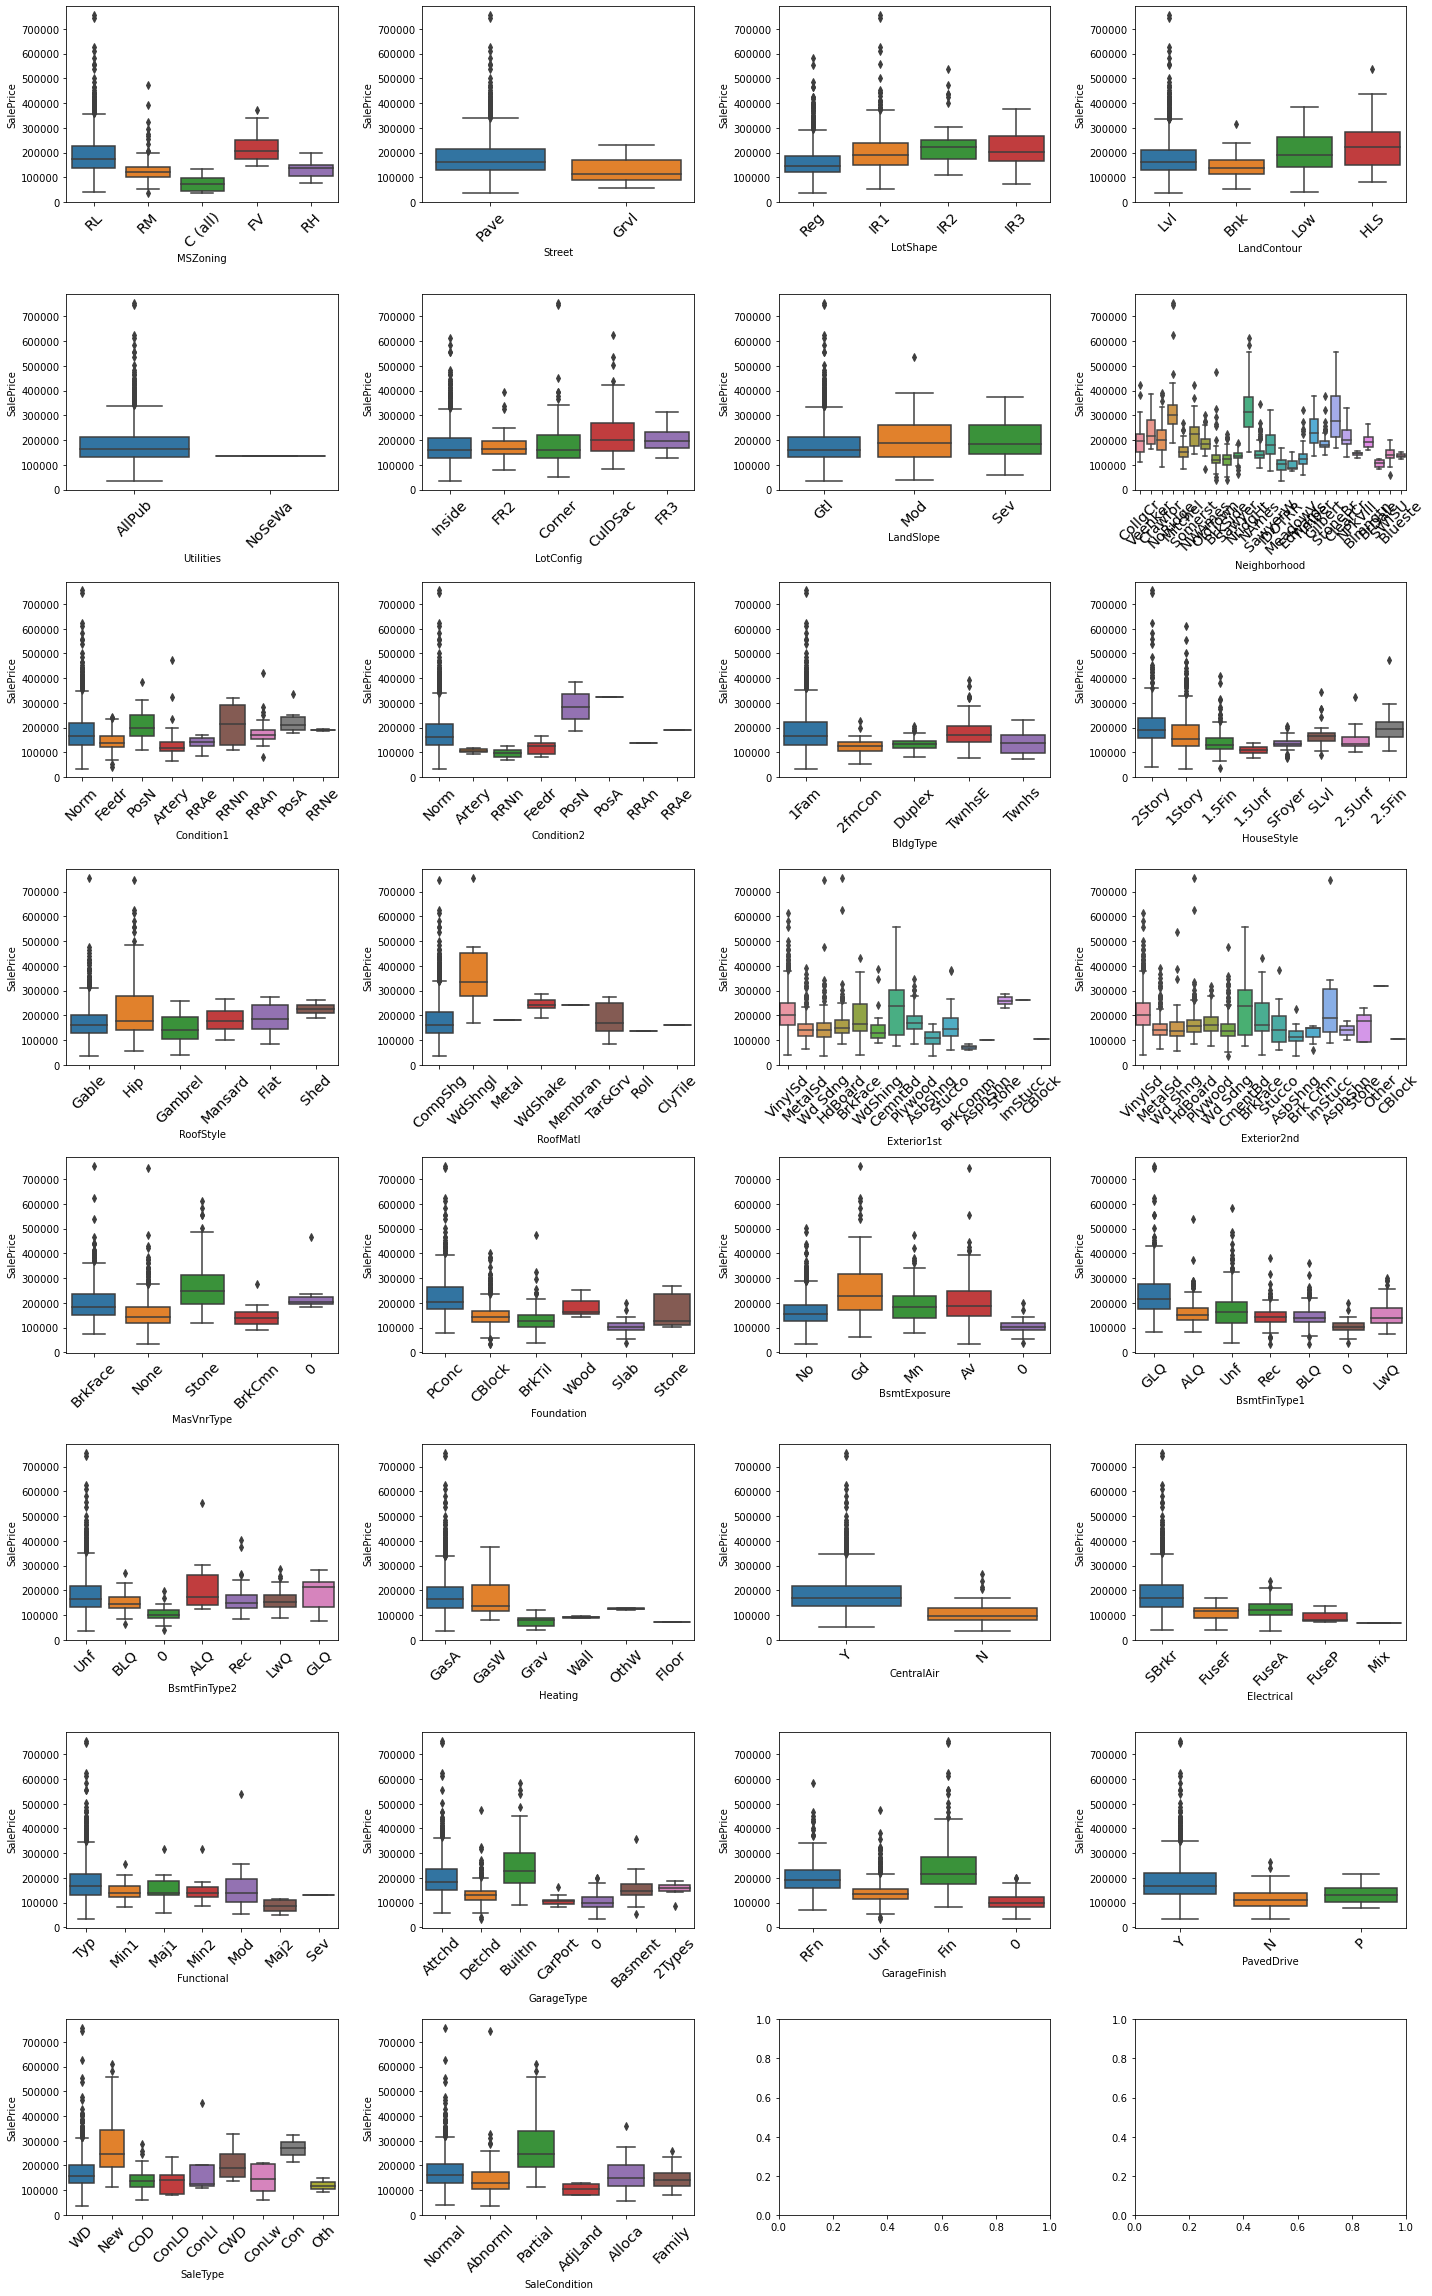

In [ ]:
temp = alldata.select_dtypes(include='object')
temp1 = temp.columns
temp2 = alldata.loc['train']
temp2 = pd.concat((temp2, train['SalePrice']), axis=1)

# Plotting
a = 4
b = (len(temp1) // a) + 1

fig, ax = plt.subplots(nrows= b,
                       ncols= a, 
                       figsize = (a * 5, b *4))
ax = ax.reshape(a*b)

for i in range(len(temp1)):
        
    plot = sns.boxplot(data=temp2,
                       x=temp2[temp1[i]],
                       y=temp2['SalePrice'],
                       ax=ax[i], 
                       order=)
    plot.set_xticklabels(plot.get_xticklabels(), rotation=45, fontsize='x-large')

plt.tight_layout()